In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

In [3]:
data = pd.read_csv('indian_liver_patient.csv')
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


<Axes: >

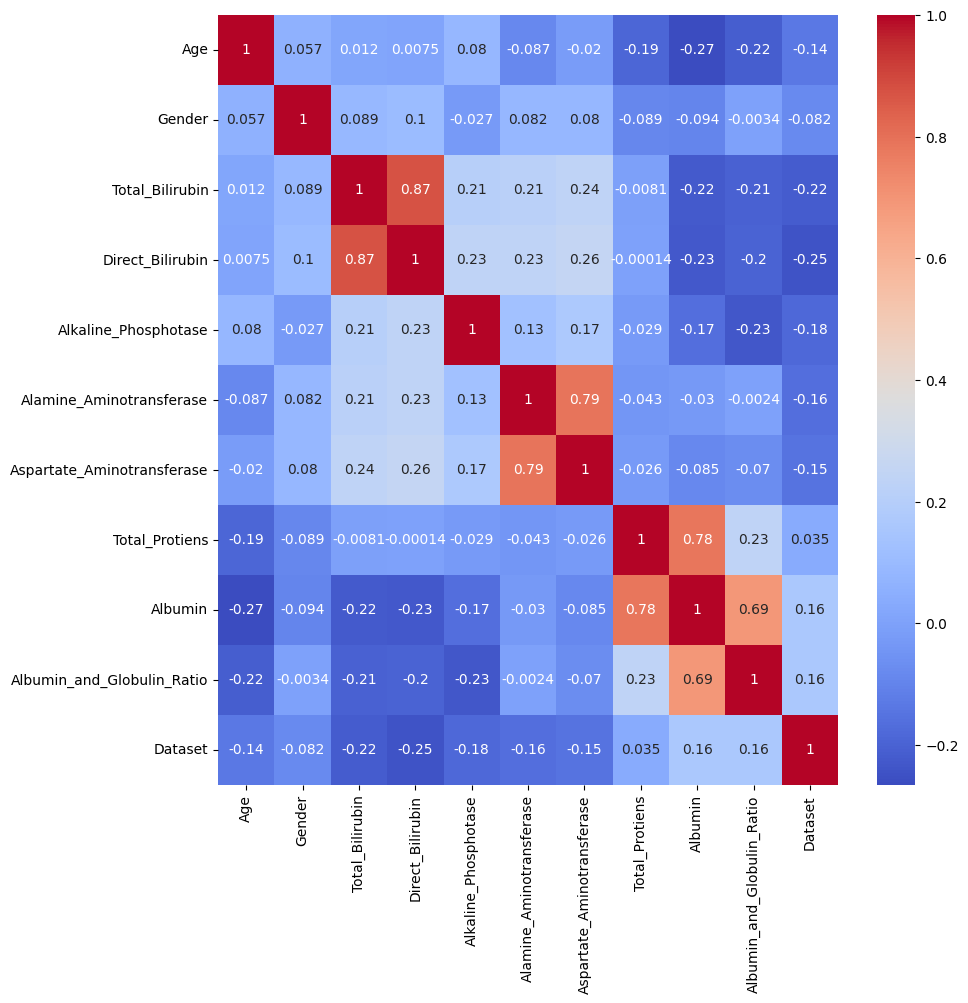

In [8]:
data['Gender'] = data['Gender'].map({'Male':1,'Female':0})
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

In [ ]:
#Total_Bilirubin and Direct_Bilirubin seems to be corelated.

In [9]:
disease = data[data['Dataset']==1]
no_disease = data[data['Dataset']==2]

In [10]:
disease

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
576,32,1,15.0,8.2,289,58,80,5.3,2.2,0.70,1
577,32,1,12.7,8.4,190,28,47,5.4,2.6,0.90,1
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1


<Axes: xlabel='Age', ylabel='count'>

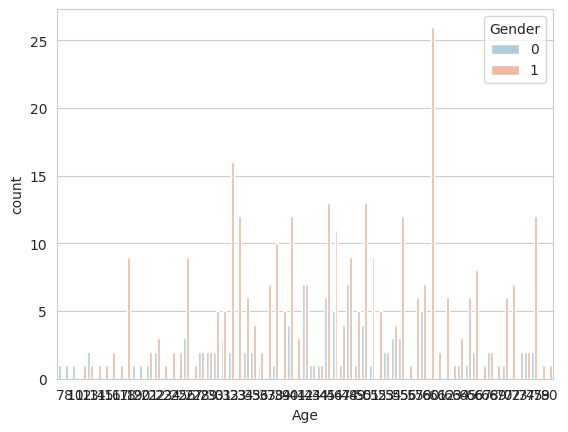

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Age',hue='Gender',data=disease,palette='RdBu_r')

<Axes: xlabel='AGE'>

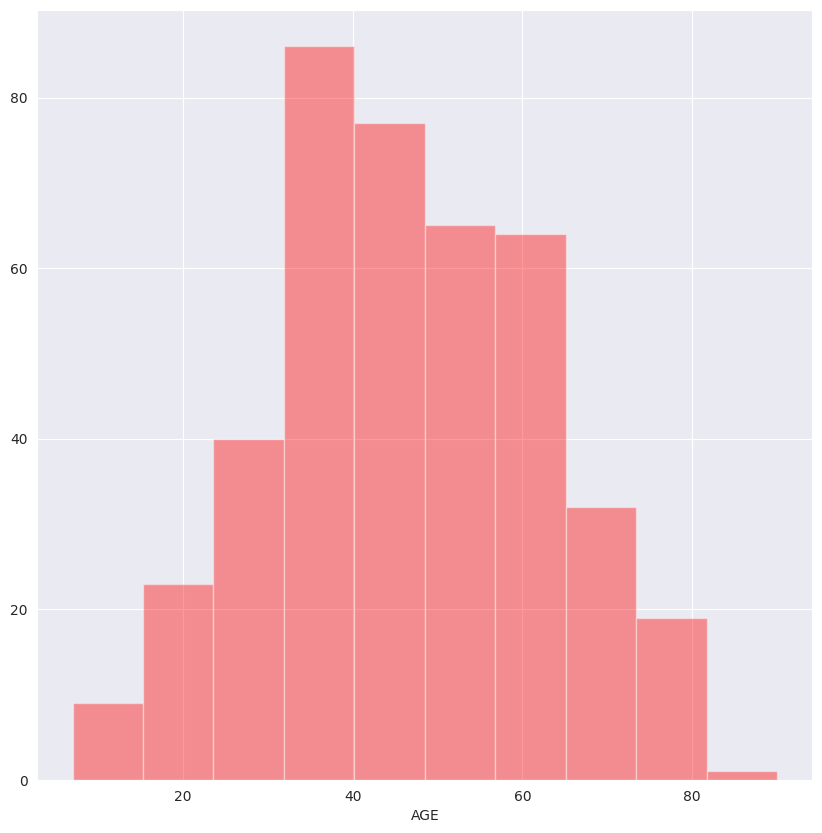

In [12]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,10))
sns.distplot(disease['Age'],bins=10,kde=False,axlabel='AGE',color='red')

<Axes: xlabel='Gender', ylabel='count'>

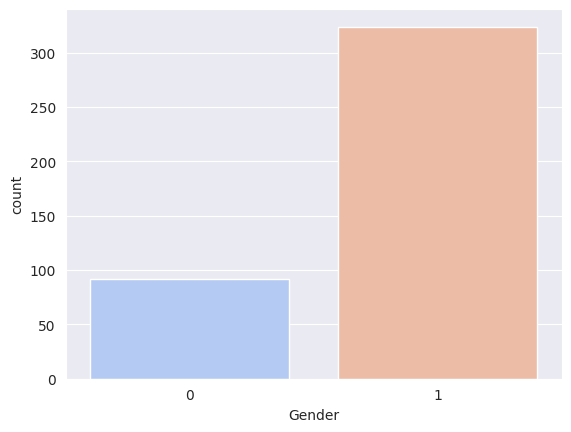

In [13]:
sns.countplot(x='Gender',data=disease,palette='coolwarm')

In [ ]:
#Males have less liver diseases as compared to females

In [16]:
for i in range(len(data)): #not diseased to 0
  if data.iloc[i,10]==2:
    data.iloc[i,10]=0

In [18]:
data['Dataset'].unique()

array([1, 0])

In [19]:
for i in range(583):
  if data.iloc[i,1]=='Male':
    data.iloc[i,1]=0
  else:
    data.iloc[i,1]=1

In [20]:
data['Gender'].unique()

array([1])

In [21]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [23]:
data.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [26]:
data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].mean(),inplace=True)

In [27]:
sum(data['Albumin_and_Globulin_Ratio'].isnull())

0

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()
scaler.fit(data.drop('Dataset',axis=1))
scaled_features = scaler.transform(data.drop('Dataset',axis=1))
liver_scaled = pd.DataFrame(scaled_features,columns=data.columns[:-1])
liver_scaled.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,1.252098,0.0,-0.418878,-0.493964,-0.426715,-0.354665,-0.318393,0.292120,0.198969,-0.147898
1,1.066637,0.0,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.937566,0.073157,-0.650697
2,1.066637,0.0,0.644919,0.931508,0.821588,-0.113522,-0.145186,0.476533,0.198969,-0.179323
3,0.819356,0.0,-0.370523,-0.387054,-0.447314,-0.365626,-0.311465,0.292120,0.324781,0.166351
4,1.684839,0.0,0.096902,0.183135,-0.393756,-0.294379,-0.176363,0.753153,-0.933340,-1.719144


In [30]:
X = liver_scaled
y = data['Dataset']

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, mean_absolute_error, mean_squared_error

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [34]:
y_test.value_counts()

Dataset
1    124
0     51
Name: count, dtype: int64

In [35]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

In [36]:
lg = LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

In [37]:
lg_pred = lg.predict(X_test)

In [104]:
lg_accuracy = accuracy_score(y_test,lg_pred)
lg_precision = precision_score(y_test,lg_pred)
lg_recall = recall_score(y_test,lg_pred)
lg_f1 = f1_score(y_test,lg_pred)
lg_mas = mean_absolute_error(y_test,lg_pred)
lg_mse = mean_squared_error(y_test,lg_pred)

In [105]:
print(lg_accuracy)
print(lg_precision)
print(lg_recall)
print(lg_f1)
print(lg_mas)
print(lg_mse)

0.6971428571428572
0.7482517482517482
0.8629032258064516
0.8014981273408239
0.3028571428571429
0.3028571428571429


In [39]:
print(classification_report(y_test,lg_pred))

              precision    recall  f1-score   support

           0       0.47      0.29      0.36        51
           1       0.75      0.86      0.80       124

    accuracy                           0.70       175
   macro avg       0.61      0.58      0.58       175
weighted avg       0.67      0.70      0.67       175



In [40]:
#K Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier

In [53]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(np.mean(y_pred != y_test))

In [50]:
X.shape

(583, 10)

In [52]:
y.shape

(583,)

Text(0, 0.5, 'Error Rate')

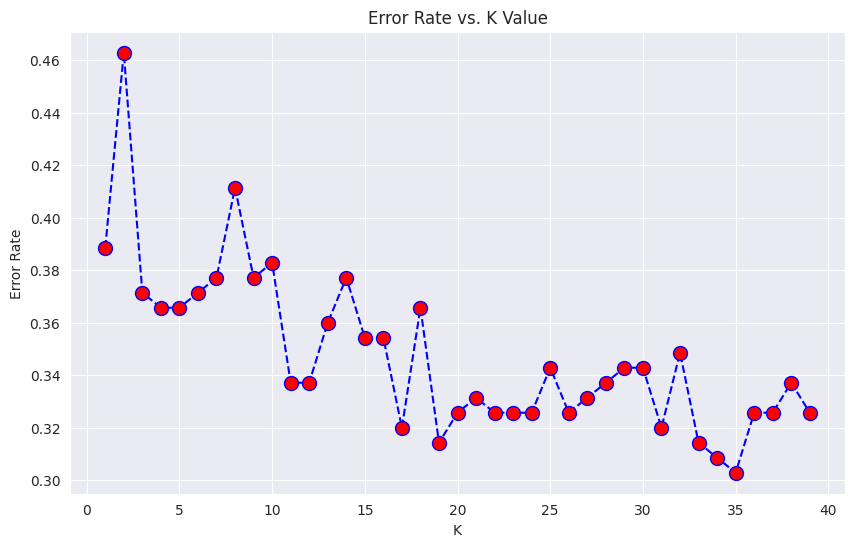

In [54]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [55]:
error_rate[36]

0.32571428571428573

In [57]:
knn = KNeighborsClassifier(n_neighbors=36)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

print('WITH K=36')
print('\n')
print(classification_report(y_test,knn_pred))

WITH K=36


              precision    recall  f1-score   support

           0       0.38      0.18      0.24        51
           1       0.72      0.88      0.79       124

    accuracy                           0.67       175
   macro avg       0.55      0.53      0.52       175
weighted avg       0.62      0.67      0.63       175



In [102]:
knn_accuracy = accuracy_score(y_test,knn_pred)
knn_precision = precision_score(y_test,knn_pred)
knn_recall = recall_score(y_test,knn_pred)
knn_f1 = f1_score(y_test,knn_pred)

In [103]:
print(knn_accuracy)
print(knn_precision)
print(knn_recall)
print(knn_f1)

0.6742857142857143
0.7218543046357616
0.8790322580645161
0.7927272727272728


In [61]:
#SVM
from sklearn.svm import SVC

In [62]:
model = SVC()
model.fit(X_train,y_train)

SVC()

In [63]:
y_pred = model.predict(X_test)

In [64]:
param_grid = {'C': [0.1,1, 10,50,100,200,1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.720 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.720 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.707 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.716 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.716 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.720 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.720 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.707 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.716 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.716 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.720 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 50, 100, 200, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [65]:
svm_predictions=grid.predict(X_test)

In [66]:
from sklearn.metrics import classification_report,confusion_matrix

In [100]:
svm_accuracy = accuracy_score(y_test,svm_predictions)
svm_precision = precision_score(y_test,svm_predictions)
svm_recall = recall_score(y_test,svm_predictions)
svm_f1 = f1_score(y_test,svm_predictions)

In [101]:
print(svm_accuracy)
print(svm_precision)
print(svm_recall)
print(svm_f1)

0.6971428571428572
0.7232704402515723
0.9274193548387096
0.812720848056537


In [69]:
print(classification_report(y_test,svm_predictions))

              precision    recall  f1-score   support

           0       0.44      0.14      0.21        51
           1       0.72      0.93      0.81       124

    accuracy                           0.70       175
   macro avg       0.58      0.53      0.51       175
weighted avg       0.64      0.70      0.64       175



In [70]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [71]:
decision_tree = DecisionTreeClassifier()

In [73]:
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [75]:
decision_tree_predictions=decision_tree.predict(X_test)

In [98]:
dt_accuracy = accuracy_score(y_test,decision_tree_predictions)
dt_precision = precision_score(y_test,decision_tree_predictions)
dt_recall = recall_score(y_test,decision_tree_predictions)
dt_f1 = f1_score(y_test,decision_tree_predictions)

In [99]:
print(dt_accuracy)
print(dt_precision)
print(dt_recall)
print(dt_f1)

0.6628571428571428
0.7777777777777778
0.7338709677419355
0.7551867219917012


In [78]:
print(classification_report(y_test,decision_tree_predictions))

              precision    recall  f1-score   support

           0       0.43      0.49      0.46        51
           1       0.78      0.73      0.76       124

    accuracy                           0.66       175
   macro avg       0.60      0.61      0.61       175
weighted avg       0.68      0.66      0.67       175



In [80]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [83]:
rfc_pred = rfc.predict(X_test)

In [96]:
rfc_accuracy = accuracy_score(y_test,rfc_pred)
rfc_precision = precision_score(y_test,rfc_pred)
rfc_recall = recall_score(y_test,rfc_pred)
rfc_f1 = f1_score(y_test,rfc_pred)

In [97]:
print(rfc_accuracy)
print(rfc_precision)
print(rfc_recall)
print(rfc_f1)

0.7085714285714285
0.7829457364341085
0.8145161290322581
0.7984189723320158


In [86]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.50      0.45      0.47        51
           1       0.78      0.81      0.80       124

    accuracy                           0.71       175
   macro avg       0.64      0.63      0.64       175
weighted avg       0.70      0.71      0.70       175



In [87]:
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier

In [88]:
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1)
abc_model = abc.fit(X_train,y_train)

In [89]:
abc_pred = abc.predict(X_test)

In [91]:
abc_model.score(X_test,y_test)

0.7085714285714285

In [93]:
#GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [94]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
accuracies = cross_val_score(gradient_booster, X_train, y_train, cv=5)
gradient_booster.fit(X_train,y_train)

GradientBoostingClassifier()

In [95]:
grid = {
    'learning_rate':[0.01,0.05,0.1],
    'n_estimators':np.arange(100,500,100),
}

gb = GradientBoostingClassifier()
gb_cv = GridSearchCV(gb, grid, cv = 4)
gb_cv.fit(X_train,y_train)
print("Best Parameters:",gb_cv.best_params_)
print("Train Score:",gb_cv.best_score_)
print("Test Score:",gb_cv.score(X_test,y_test))

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Train Score: 0.7181372549019608
Test Score: 0.68


In [106]:
#Performance Analysis
d = {'ML Algo':['Logistic Regression','K Nearest Neighbors','Support Vector Machine','Decision Tree','Random Forest Classifier'],
     'Accuracy Score':[lg_accuracy*100,knn_accuracy*100,svm_accuracy*100,dt_accuracy*100,rfc_accuracy*100],
     'Precision Score':[lg_precision*100,knn_precision*100,svm_precision*100,dt_precision*100,rfc_precision*100],
     'Recall Score':[lg_recall*100,knn_recall*100,svm_recall*100,dt_recall*100,rfc_recall*100],
     'f1 Score':[lg_f1*100,knn_f1*100,svm_f1*100,dt_f1*100,rfc_f1*100],
     }
df = pd.DataFrame(d)
df

,ML Algo,Accuracy Score,Precision Score,Recall Score,f1 Score
0,Logistic Regression,69.714286,74.825175,86.290323,80.149813
1,K Nearest Neighbors,67.428571,72.185430,87.903226,79.272727
2,Support Vector Machine,69.714286,72.327044,92.741935,81.272085
3,Decision Tree,66.285714,77.777778,73.387097,75.518672
4,Random Forest Classifier,70.857143,78.294574,81.451613,79.841897


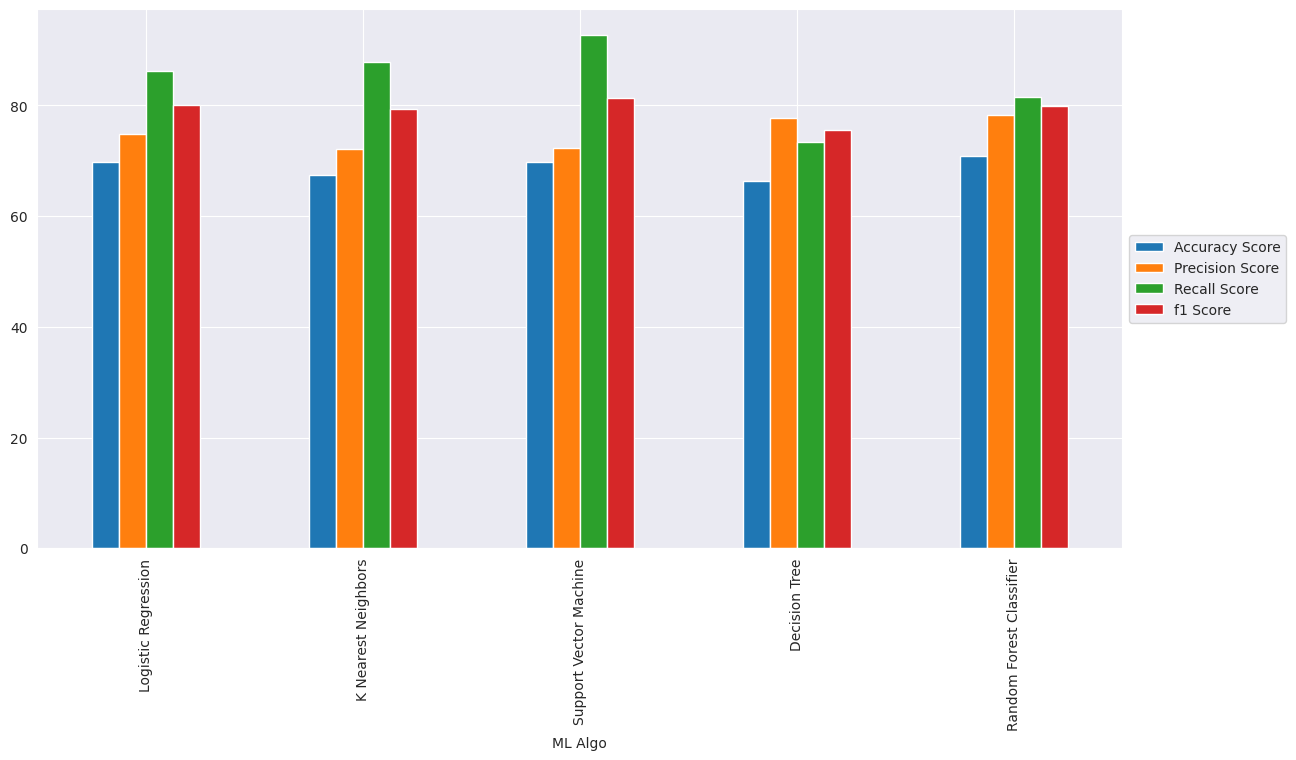

In [109]:
df.plot.bar(x='ML Algo',figsize=(14,7))
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))